<a href="https://colab.research.google.com/github/Abhilash9391/mySubmissions_ihub/blob/main/module_5_lab_2_KnnRegressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implemented KnnRegressor using california housing dataset as part of lab5 module-2 and got to know that with increas in dimensionality and without normalization is just as worse as just predicting the mean(almost)

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing


In [56]:
data = fetch_california_housing()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['MedHouseVal'] = data.target

In [57]:
df.shape

(20640, 9)

In [58]:
from sklearn.neighbors import KNeighborsRegressor


In [59]:
knn = KNeighborsRegressor(n_neighbors=50)

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=["MedHouseVal"]),df["MedHouseVal"],test_size=0.3)

In [62]:
regressor = knn.fit(x_train,y_train)

In [63]:
y_predict = regressor.predict(x_test)

In [64]:
from sklearn.metrics import r2_score

In [65]:
score = r2_score(y_test,y_predict)
score

0.06459548148593108

<Figure size 1000x600 with 0 Axes>

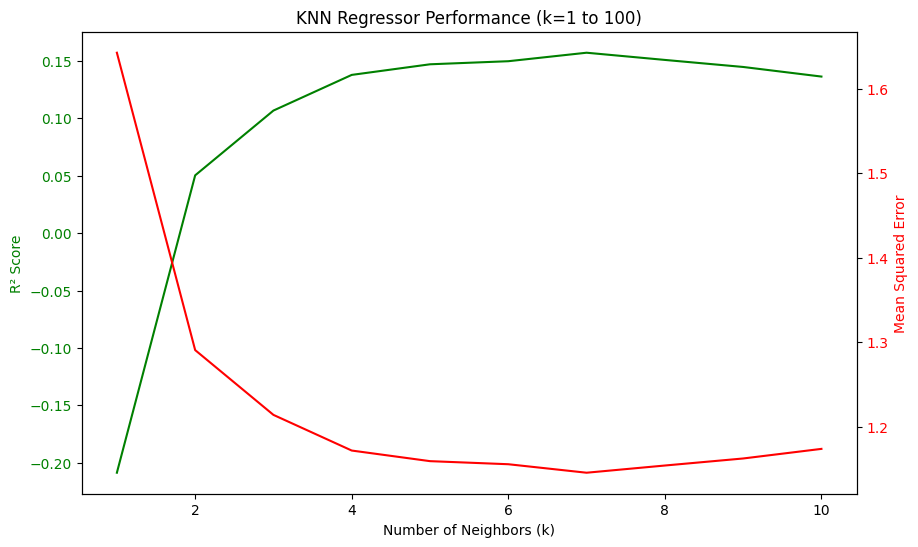

In [67]:
r2 = []
error = []

for i in range(1,11):
  temp_knn = KNeighborsRegressor(n_neighbors=i)
  temp_regressor = temp_knn.fit(x_train,y_train)
  temp_y_pred = temp_regressor.predict(x_test)
  r2.append(r2_score(y_test,temp_y_pred))
  error.append(np.mean((y_test-temp_y_pred)**2))

plt.figure(figsize=(10,6))

x_range = range(1,11)

fig, ax1 = plt.subplots(figsize=(10,6))

# Plot R²
ax1.plot(x_range, r2, color="green", label="R² Score")
ax1.set_xlabel("Number of Neighbors (k)")
ax1.set_ylabel("R² Score", color="green")
ax1.tick_params(axis="y", labelcolor="green")

# Second y-axis for MSE
ax2 = ax1.twinx()
ax2.plot(x_range, error, color="red", label="MSE")
ax2.set_ylabel("Mean Squared Error", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("KNN Regressor Performance (k=1 to 100)")
plt.show()


In [68]:
from sklearn.preprocessing import MinMaxScaler

In [69]:
scaler = MinMaxScaler()
x_test = scaler.fit_transform(x_test)

In [70]:
x_train = scaler.transform(x_train)

In [71]:
temp_regressor2 = KNeighborsRegressor(n_neighbors=3)
regressor2 = temp_regressor2.fit(x_test,y_test)
y_pred2 = regressor2.predict(x_test)

In [72]:
score = r2_score(y_test,y_pred2)
score

0.8278919402334941

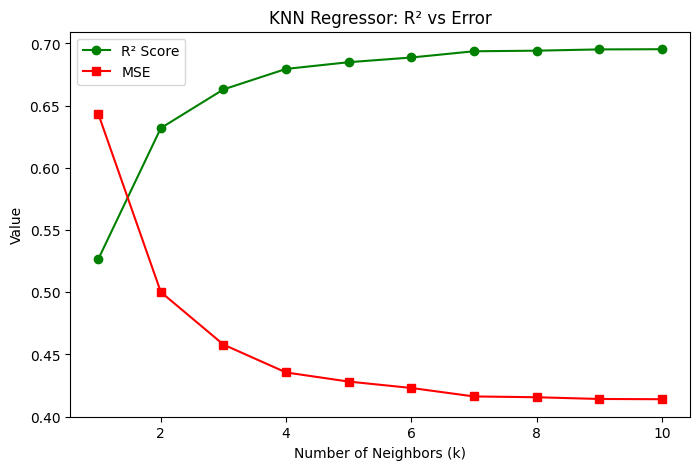

In [73]:
r22 = []
error2 = []

for i in range(1,11):
  temp_knn2 = KNeighborsRegressor(n_neighbors=i)
  temp_regressor2 = temp_knn2.fit(x_train,y_train)
  temp_y_pred2 = temp_regressor2.predict(x_test)
  r22.append(r2_score(y_test,temp_y_pred2))
  error2.append(np.mean((y_test-temp_y_pred2)**2))

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), r22, c="green", marker="o", label="R² Score")
plt.plot(range(1, 11), error2, c="red", marker="s", label="MSE")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Value")
plt.title("KNN Regressor: R² vs Error")
plt.legend()
plt.show()